###Objective : Predicting the position of the player based on characteristics

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_csv('/content/players_fifa23 (1).csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 90 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 18539 non-null  int64  
 1   Name               18539 non-null  object 
 2   FullName           18539 non-null  object 
 3   Age                18539 non-null  int64  
 4   Height             18539 non-null  int64  
 5   Weight             18539 non-null  int64  
 6   PhotoUrl           18539 non-null  object 
 7   Nationality        18539 non-null  object 
 8   Overall            18539 non-null  int64  
 9   Potential          18539 non-null  int64  
 10  Growth             18539 non-null  int64  
 11  TotalStats         18539 non-null  int64  
 12  BaseStats          18539 non-null  int64  
 13  Positions          18539 non-null  object 
 14  BestPosition       18539 non-null  object 
 15  Club               18539 non-null  object 
 16  ValueEUR           185

In [10]:
df.head()

,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,158023,L. Messi,Lionel Messi,35,169,67,https://cdn.sofifa.net/players/158/023/23_60.png,Argentina,91,91,...,91,88,91,67,66,67,62,53,62,22
1,165153,K. Benzema,Karim Benzema,34,185,81,https://cdn.sofifa.net/players/165/153/23_60.png,France,91,91,...,89,84,89,67,67,67,63,58,63,21
2,188545,R. Lewandowski,Robert Lewandowski,33,185,81,https://cdn.sofifa.net/players/188/545/23_60.png,Poland,91,91,...,86,83,86,67,69,67,64,63,64,22
3,192985,K. De Bruyne,Kevin De Bruyne,31,181,70,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,91,91,...,91,91,91,82,82,82,78,72,78,24
4,231747,K. Mbappé,Kylian Mbappé,23,182,73,https://cdn.sofifa.net/players/231/747/23_60.png,France,91,95,...,92,84,92,70,66,70,66,57,66,21


In [11]:
df.columns

Index(['ID', 'Name', 'FullName', 'Age', 'Height', 'Weight', 'PhotoUrl',
       'Nationality', 'Overall', 'Potential', 'Growth', 'TotalStats',
       'BaseStats', 'Positions', 'BestPosition', 'Club', 'ValueEUR', 'WageEUR',
       'ReleaseClause', 'ClubPosition', 'ContractUntil', 'ClubNumber',
       'ClubJoined', 'OnLoad', 'NationalTeam', 'NationalPosition',
       'NationalNumber', 'PreferredFoot', 'IntReputation', 'WeakFoot',
       'SkillMoves', 'AttackingWorkRate', 'DefensiveWorkRate', 'PaceTotal',
       'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal',
       'PhysicalityTotal', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking',

In [12]:
needed_columns = ['ID', 'Name', 'Age', 'Height', 'Weight',
       'Overall', 'Potential', 'Growth', 'TotalStats',
       'BaseStats', 'BestPosition', 'Club', 'ValueEUR', 'WageEUR',
       'ReleaseClause', 'ContractUntil', 'ClubJoined', 'OnLoad',
       'PreferredFoot', 'IntReputation', 'WeakFoot','Nationality',
       'SkillMoves', 'AttackingWorkRate', 'DefensiveWorkRate', 'PaceTotal',
       'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal',
       'PhysicalityTotal', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
df= df[needed_columns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 65 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 18539 non-null  int64  
 1   Name               18539 non-null  object 
 2   Age                18539 non-null  int64  
 3   Height             18539 non-null  int64  
 4   Weight             18539 non-null  int64  
 5   Overall            18539 non-null  int64  
 6   Potential          18539 non-null  int64  
 7   Growth             18539 non-null  int64  
 8   TotalStats         18539 non-null  int64  
 9   BaseStats          18539 non-null  int64  
 10  BestPosition       18539 non-null  object 
 11  Club               18539 non-null  object 
 12  ValueEUR           18539 non-null  int64  
 13  WageEUR            18539 non-null  int64  
 14  ReleaseClause      18539 non-null  int64  
 15  ContractUntil      18447 non-null  float64
 16  ClubJoined         185

In [14]:
df.head()

,ID,Name,Age,Height,Weight,Overall,Potential,Growth,TotalStats,BaseStats,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,L. Messi,35,169,67,91,91,0,2190,452,...,75,96,20,35,24,6,11,15,14,8
1,165153,K. Benzema,34,185,81,91,91,0,2147,455,...,84,90,43,24,18,13,11,5,5,7
2,188545,R. Lewandowski,33,185,81,91,91,0,2205,458,...,90,88,35,42,19,15,6,12,8,10
3,192985,K. De Bruyne,31,181,70,91,91,0,2303,483,...,83,89,68,65,53,15,13,5,10,13
4,231747,K. Mbappé,23,182,73,91,95,4,2177,470,...,80,88,26,34,32,13,5,7,11,6


##Checking null values

In [17]:
for i in df.columns:
  if df[i].isnull().sum()>0:
    print(i,df[i].isnull().sum())

ContractUntil 92


In [19]:
(df['ContractUntil'].isnull().sum()/df.shape[0])*100

0.49625114623226707

In [23]:
df.drop(df[df['ContractUntil'].isnull()].index, axis = 0, inplace = True)

##Handling categorical columns

In [24]:
for i in df.columns:
  if df[i].dtype == 'object':
    print(i)

Name
BestPosition
Club
PreferredFoot
Nationality
AttackingWorkRate
DefensiveWorkRate


In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Club']=le.fit_transform(df['Club'])
df['AttackingWorkRate'] = le.fit_transform(df['AttackingWorkRate'])
df['DefensiveWorkRate'] = le.fit_transform(df['DefensiveWorkRate'])
df['PreferredFoot'] = le.fit_transform(df['PreferredFoot'])


In [29]:
df['BestPosition'].unique()

array(['CM', 'CF', 'RW', 'GK', 'CB', 'LW', 'LM', 'LB', 'RM', 'RB'],
      dtype=object)

In [28]:
merge_pos = {'LWB' : 'LW', 'RWB': 'RW', 'ST': 'CF', 'CAM': 'CM', 'CDM': 'CM'}
df = df.replace({'BestPosition':merge_pos})

In [30]:
mapping = {'CF':0, 'CM':1, 'RW':2, 'GK':3, 'CB':4, 'LW':5, 'LM': 6, 'LB':7, 'RM':8, 'RB': 9}

In [31]:
df=df.replace({'BestPosition':mapping})

In [36]:
df['BestPosition'].unique()

array([1, 0, 2, 3, 4, 5, 6, 7, 8, 9])

In [37]:
df.head()

,ID,Name,Age,Height,Weight,Overall,Potential,Growth,TotalStats,BaseStats,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,L. Messi,35,169,67,91,91,0,2190,452,...,75,96,20,35,24,6,11,15,14,8
1,165153,K. Benzema,34,185,81,91,91,0,2147,455,...,84,90,43,24,18,13,11,5,5,7
2,188545,R. Lewandowski,33,185,81,91,91,0,2205,458,...,90,88,35,42,19,15,6,12,8,10
3,192985,K. De Bruyne,31,181,70,91,91,0,2303,483,...,83,89,68,65,53,15,13,5,10,13
4,231747,K. Mbappé,23,182,73,91,95,4,2177,470,...,80,88,26,34,32,13,5,7,11,6


##Exporting the cleaned data

In [38]:
df.to_csv('fifa23_cleaned.csv', index = False)

#Splitting the data

In [40]:
X = df.drop(['BestPosition', 'Nationality', 'ID'], axis = 1)
Y = pd.DataFrame(df['BestPosition'])



In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

In [42]:
X_train = X_train.drop(['Name'], axis = 1)
test_names = X_test['Name']
X_test = X_test.drop(['Name'], axis = 1)





In [43]:
top = df.sort_values(by = 'Overall', ascending = False).head(20)

In [44]:
top_pos = top['BestPosition']
top_names = top['Name']
top = top.drop(['Name', 'BestPosition', 'Nationality', 'ID'], axis = 1)
top.head()

,Age,Height,Weight,Overall,Potential,Growth,TotalStats,BaseStats,Club,ValueEUR,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,35,169,67,91,91,0,2190,452,453,54000000,...,75,96,20,35,24,6,11,15,14,8
2,33,185,81,91,91,0,2205,458,230,84000000,...,90,88,35,42,19,15,6,12,8,10
3,31,181,70,91,91,0,2303,483,399,107500000,...,83,89,68,65,53,15,13,5,10,13
4,23,182,73,91,95,4,2177,470,453,190500000,...,80,88,26,34,32,13,5,7,11,6
1,34,185,81,91,91,0,2147,455,494,64000000,...,84,90,43,24,18,13,11,5,5,7


##Handling the imbalance dataset

<Axes: xlabel='BestPosition', ylabel='count'>

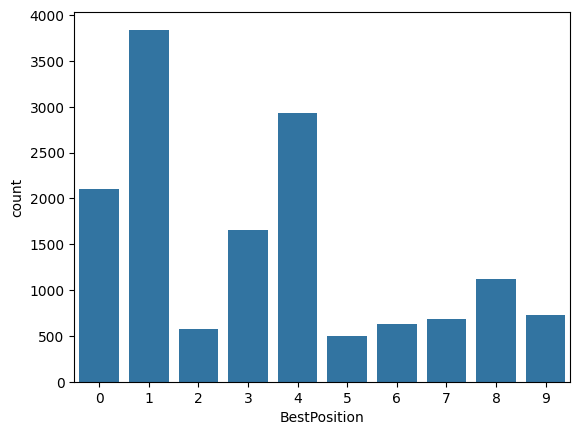

In [45]:
sns.countplot(x = 'BestPosition', data = Y_train)

In [46]:
from imblearn.over_sampling import RandomOverSampler

In [47]:
oversample = RandomOverSampler(sampling_strategy = 'minority')

In [48]:
X_train, Y_train = oversample.fit_resample(X_train, Y_train)
X_train, Y_train = oversample.fit_resample(X_train, Y_train)
X_train, Y_train = oversample.fit_resample(X_train, Y_train)
X_train, Y_train = oversample.fit_resample(X_train, Y_train)

<Axes: xlabel='BestPosition', ylabel='count'>

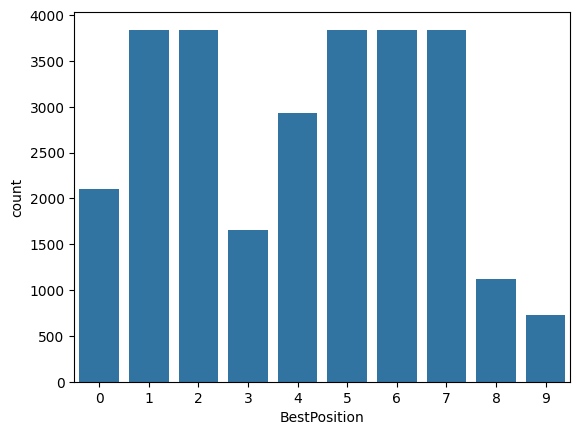

In [49]:
sns.countplot(x = 'BestPosition', data = Y_train)

##Feature Scaling

In [50]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

X_train= mms.fit_transform(X_train)
X_test= mms.fit_transform(X_test)

top = mms.fit_transform(top)

In [51]:
X_train


array([[0.32142857, 0.54901961, 0.37254902, ..., 0.04395604, 0.06741573,
        0.09090909],
       [0.14285714, 0.35294118, 0.45098039, ..., 0.06593407, 0.07865169,
        0.11363636],
       [0.21428571, 0.29411765, 0.31372549, ..., 0.07692308, 0.14606742,
        0.07954545],
       ...,
       [0.5       , 0.29411765, 0.2745098 , ..., 0.12087912, 0.13483146,
        0.07954545],
       [0.39285714, 0.50980392, 0.41176471, ..., 0.04395604, 0.14606742,
        0.09090909],
       [0.60714286, 0.39215686, 0.31372549, ..., 0.10989011, 0.1011236 ,
        0.10227273]])

In [52]:
X_train.shape

(27732, 61)

##Modelling


###Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
lr = LogisticRegression()

In [56]:
lr.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
Y_pred_lr = lr.predict(X_test)

In [58]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [59]:
confusion_matrix(Y_test, Y_pred_lr)

array([[461,   8,  15,   0,   0,   4,  26,   1,   7,   0],
       [ 16, 709,  29,   0,  63,   7,  81,  19,  32,   6],
       [  3,   5,  88,   0,   4,   3,  15,   0,   3,  11],
       [  0,   0,   0, 391,   0,   0,   0,   0,   0,   0],
       [  1,  10,   4,   0, 673,   0,   0,  18,   0,   5],
       [  2,   2,  21,   0,   0,  24,  24,  40,   3,   0],
       [  3,   5,  26,   0,   0,  14, 112,   7,   1,   0],
       [  0,   1,   5,   0,   5,  18,   3, 144,   0,   2],
       [  8,  35, 100,   0,   0,   5,  50,   0, 115,   0],
       [  0,   2, 112,   0,  15,   1,   0,   3,   2,  62]])

In [60]:
print(classification_report(Y_test, Y_pred_lr))

              precision    recall  f1-score   support

           0       0.93      0.88      0.91       522
           1       0.91      0.74      0.82       962
           2       0.22      0.67      0.33       132
           3       1.00      1.00      1.00       391
           4       0.89      0.95      0.92       711
           5       0.32      0.21      0.25       116
           6       0.36      0.67      0.47       168
           7       0.62      0.81      0.70       178
           8       0.71      0.37      0.48       313
           9       0.72      0.31      0.44       197

    accuracy                           0.75      3690
   macro avg       0.67      0.66      0.63      3690
weighted avg       0.81      0.75      0.76      3690



###Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rf = RandomForestClassifier(criterion = 'entropy', n_estimators = 50)

In [63]:
rf.fit(X_train, Y_train)

<ipython-input-63-d0055dbae671>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


RandomForestClassifier(criterion='entropy', n_estimators=50)

In [64]:
Y_pred_rf = rf.predict(X_test)

In [65]:
confusion_matrix(Y_test, Y_pred_rf)

array([[484,   8,   3,   0,   1,   1,  11,   1,  13,   0],
       [ 25, 817,   5,   0,  40,   4,  19,   7,  40,   5],
       [ 11,  24,  43,   0,   4,   0,   6,   2,  12,  30],
       [  0,   0,   0, 391,   0,   0,   0,   0,   0,   0],
       [  0,  22,   0,   0, 671,   0,   0,  12,   0,   6],
       [  7,  12,   9,   0,   0,  27,  13,  36,   9,   3],
       [ 12,  25,  13,   0,   0,  10,  82,  12,  13,   1],
       [  0,   1,   2,   0,  12,  20,   1, 136,   0,   6],
       [ 22,  72,  17,   0,   0,   3,  15,   0, 177,   7],
       [  0,  14,  34,   0,  14,   0,   0,   2,   5, 128]])

In [66]:
print(classification_report(Y_test, Y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       522
           1       0.82      0.85      0.83       962
           2       0.34      0.33      0.33       132
           3       1.00      1.00      1.00       391
           4       0.90      0.94      0.92       711
           5       0.42      0.23      0.30       116
           6       0.56      0.49      0.52       168
           7       0.65      0.76      0.70       178
           8       0.66      0.57      0.61       313
           9       0.69      0.65      0.67       197

    accuracy                           0.80      3690
   macro avg       0.69      0.67      0.68      3690
weighted avg       0.79      0.80      0.79      3690



###Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
dt = DecisionTreeClassifier(max_features = 39, max_depth = 10)

In [69]:
dt.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=10, max_features=39)

In [70]:
Y_pred_dt = dt.predict(X_test)

In [71]:
print(classification_report(Y_test, Y_pred_dt))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78       522
           1       0.78      0.59      0.68       962
           2       0.15      0.68      0.25       132
           3       1.00      1.00      1.00       391
           4       0.91      0.83      0.87       711
           5       0.18      0.40      0.25       116
           6       0.31      0.54      0.40       168
           7       0.53      0.57      0.55       178
           8       0.52      0.30      0.38       313
           9       0.69      0.05      0.09       197

    accuracy                           0.63      3690
   macro avg       0.60      0.56      0.52      3690
weighted avg       0.74      0.63      0.66      3690



###SVM

In [72]:
from sklearn.svm import SVC

In [73]:
svc =  SVC()

In [74]:
svc.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
Y_pred_svc = svc.predict(X_test)

In [ ]:
print(classification_report(Y_test, Y_pred_svc))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       522
           1       0.92      0.77      0.84       962
           2       0.23      0.77      0.35       132
           3       1.00      1.00      1.00       391
           4       0.93      0.94      0.94       711
           5       0.37      0.49      0.42       116
           6       0.42      0.69      0.52       168
           7       0.68      0.72      0.70       178
           8       0.75      0.44      0.55       313
           9       0.78      0.11      0.19       197

    accuracy                           0.77      3690
   macro avg       0.70      0.68      0.64      3690
weighted avg       0.83      0.77      0.77      3690



###Ensemble Methods

In [76]:
from sklearn.ensemble import AdaBoostClassifier

In [77]:
ada = AdaBoostClassifier()

In [78]:
ada.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier()

In [79]:
Y_pred_adadt = ada.predict(X_test)

In [80]:
print(classification_report(Y_test, Y_pred_adadt))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76       522
           1       0.81      0.36      0.50       962
           2       0.08      0.25      0.12       132
           3       1.00      1.00      1.00       391
           4       0.79      0.82      0.81       711
           5       0.16      0.17      0.17       116
           6       0.31      0.48      0.38       168
           7       0.43      0.67      0.53       178
           8       0.40      0.30      0.35       313
           9       0.43      0.50      0.46       197

    accuracy                           0.59      3690
   macro avg       0.51      0.54      0.51      3690
weighted avg       0.67      0.59      0.61      3690



In [81]:
ada_lr = AdaBoostClassifier(LogisticRegression())

In [82]:
ada_lr.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(estimator=LogisticRegression())

In [83]:
Y_pred_adalr = ada_lr.predict(X_test)

In [84]:
print(classification_report(Y_test, Y_pred_adalr))

              precision    recall  f1-score   support

           0       0.97      0.49      0.65       522
           1       0.73      0.55      0.63       962
           2       0.11      0.81      0.19       132
           3       1.00      1.00      1.00       391
           4       0.96      0.72      0.82       711
           5       0.14      0.30      0.19       116
           6       0.25      0.33      0.28       168
           7       0.40      0.65      0.50       178
           8       0.00      0.00      0.00       313
           9       0.00      0.00      0.00       197

    accuracy                           0.54      3690
   macro avg       0.46      0.49      0.43      3690
weighted avg       0.66      0.54      0.57      3690



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###KNN

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
knn = KNeighborsClassifier(n_neighbors=10)

In [87]:
knn.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

In [88]:
Y_pred_knn = knn.predict(X_test)

In [89]:
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81       522
           1       0.78      0.56      0.65       962
           2       0.15      0.62      0.24       132
           3       1.00      1.00      1.00       391
           4       0.92      0.82      0.87       711
           5       0.16      0.42      0.23       116
           6       0.26      0.50      0.34       168
           7       0.41      0.51      0.45       178
           8       0.67      0.21      0.32       313
           9       0.64      0.15      0.25       197

    accuracy                           0.62      3690
   macro avg       0.59      0.55      0.52      3690
weighted avg       0.75      0.62      0.65      3690



###Since random forset is performing well we use the predictions made my random forest

In [90]:
top = pd.DataFrame(top)
for i in range(top.shape[0]):
  pred_pos = rf.predict(top.iloc[[i]])[0]

  pred = list(mapping.keys())[list(mapping.values()).index(pred_pos)]
  true_pos = list(mapping.keys())[list(mapping.values()).index(top_pos.iloc[i])]

  print('Name: {} \nPredictions: {} \nTrue Position: {} \n'.format(top_names.iloc[i], pred, true_pos))

Name: L. Messi 
Predictions: CM 
True Position: CM 

Name: R. Lewandowski 
Predictions: CF 
True Position: CF 

Name: K. De Bruyne 
Predictions: CM 
True Position: CM 

Name: K. Mbappé 
Predictions: CF 
True Position: CF 

Name: K. Benzema 
Predictions: CF 
True Position: CF 

Name: M. Salah 
Predictions: RW 
True Position: RW 

Name: T. Courtois 
Predictions: GK 
True Position: GK 

Name: M. Neuer 
Predictions: GK 
True Position: GK 

Name: Cristiano Ronaldo 
Predictions: CF 
True Position: CF 

Name: V. van Dijk 
Predictions: CB 
True Position: CB 

Name: S. Mané 
Predictions: RW 
True Position: LM 

Name: N. Kanté 
Predictions: CM 
True Position: CM 

Name: J. Kimmich 
Predictions: CM 
True Position: CM 

Name: Ederson 
Predictions: GK 
True Position: GK 

Name: Alisson 
Predictions: GK 
True Position: GK 

Name: J. Oblak 
Predictions: GK 
True Position: GK 

Name: Casemiro 
Predictions: CB 
True Position: CM 

Name: H. Son 
Predictions: LW 
True Position: LW 

Name: H. Kane 
Predic